## Import required libraries

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

## 📥 Data collection

The dataset used in this project is **synthetic**, but was carefully constructed based on real client progress patterns observed during my work as a Health Data Analyst and Coach. 
It captures realistic changes in key health and fitness indicators such as gender, age, weight, height, fitness level.

In addition to these core performance metrics, the dataset has been enhanced with critical physiological and behavioral variables commonly used in applied health analytics. 
These include:
- Body fat percentage and muscle mass percentage, estimated with respect to gender, age, and physical performance benchmarks.
- Diet compliance, training frequency, and presence of serious health conditions — all introduced as independent variables relevant for predictive modeling and outcome analysis.

The dataset was designed to reflect real-world gym constraints, physiological ranges, and demographic diversity — including beginners, overweight individuals, elderly clients, special population with health problems and athletes (advanced fitness level).  

Although I have worked extensively with real health and fitness data in a professional setting, for this public-facing project, I created a **synthetic and anonymized dataset** to protect client privacy.
This approach enables demonstration of practical machine learning applications in health analytics without compromising client confidentiality.

In [90]:
df = pd.read_csv('/Users/ainurkhussainova/Projects/GitHub/fitness_clients_dataset_v9.csv')

In [91]:
df.head()

,unique_number,gender,age,fitness_level,height_cm,weight_kg,body_fat_%,muscle_mass_%,training_frequency_per_month,diet_compliance,serious_health_condition,achieved_goals
0,no355,female,52,intermediate,157,69,20,28,11,no,no,no
1,ig289,female,29,novice,163,52,27,21,10,yes,no,yes
2,6kuq5,female,43,novice,175,59,33,20,7,no,no,no
3,oua7i,female,34,novice,176,60,31,21,8,yes,yes,no
4,nwonk,female,38,intermediate,154,52,22,26,11,yes,no,yes


## 🔎📊 EDA (Data exploration)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   unique_number                 200 non-null    object
 1   gender                        200 non-null    object
 2   age                           200 non-null    int64 
 3   fitness_level                 200 non-null    object
 4   height_cm                     200 non-null    int64 
 5   weight_kg                     200 non-null    int64 
 6   body_fat_%                    200 non-null    int64 
 7   muscle_mass_%                 200 non-null    int64 
 8   training_frequency_per_month  200 non-null    int64 
 9   diet_compliance               200 non-null    object
 10  serious_health_condition      200 non-null    object
 11  achieved_goals                200 non-null    object
dtypes: int64(6), object(6)
memory usage: 18.9+ KB


In [93]:
df.describe()

,age,height_cm,weight_kg,body_fat_%,muscle_mass_%,training_frequency_per_month
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,37.365000,169.985000,72.340000,23.270000,30.175000,10.080000
std,12.510569,9.546226,13.351619,5.307348,6.943011,3.609535
min,17.000000,154.000000,48.000000,12.000000,20.000000,5.000000
25%,28.000000,162.000000,62.000000,19.000000,23.000000,7.000000
50%,35.500000,170.000000,72.500000,24.000000,30.500000,10.000000
75%,46.250000,176.000000,81.000000,27.000000,35.000000,12.000000
max,65.000000,188.000000,100.000000,33.000000,43.000000,20.000000


In [94]:
df.nunique()

unique_number                   200
gender                            2
age                              49
fitness_level                     3
height_cm                        34
weight_kg                        52
body_fat_%                       22
muscle_mass_%                    24
training_frequency_per_month     16
diet_compliance                   2
serious_health_condition          2
achieved_goals                    2
dtype: int64

In [95]:
columns = [
    'gender', 'fitness_level', 'serious_health_condition',
    'diet_compliance', 'achieved_goals']

for col in columns:
    print(f"{col}: {df[col].unique()}")

gender: ['female' 'male']
fitness_level: ['intermediate' 'novice' 'advanced']
serious_health_condition: ['no' 'yes']
diet_compliance: ['no' 'yes']
achieved_goals: ['no' 'yes']


In [96]:
# Total count of 'yes' and 'no' of Achieved goals column
goal_counts = df['achieved_goals'].value_counts()
goal_counts

achieved_goals
yes    107
no      93
Name: count, dtype: int64

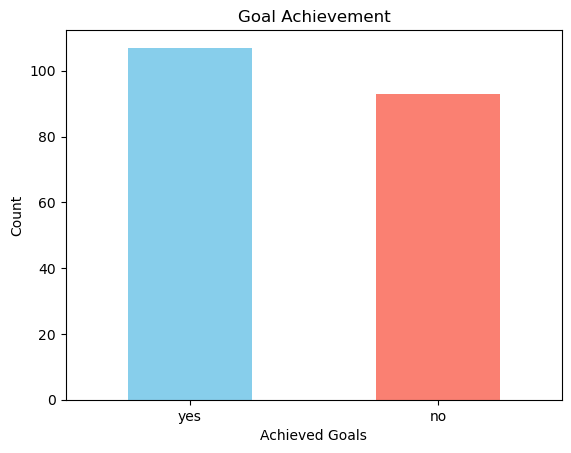

In [97]:
goal_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Goal Achievement')
plt.xlabel('Achieved Goals')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The majority of clients in the dataset achieved their goals, with more than 53% reporting "yes" and around 47% reporting "no."

Handling missing or physiologically implausible values.
Even though the dataset is synthetic, it is important to ensure data quality and realism. This step includes:
- Checking for missing values across all columns.
- Identifying negative values in numeric fields, which are often invalid.

In [98]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

unique_number                   0
gender                          0
age                             0
fitness_level                   0
height_cm                       0
weight_kg                       0
body_fat_%                      0
muscle_mass_%                   0
training_frequency_per_month    0
diet_compliance                 0
serious_health_condition        0
achieved_goals                  0
dtype: int64


In [99]:
# Check for negative values in numeric columns
numeric_cols = df.select_dtypes(include='number').columns
negative_values = (df[numeric_cols] < 0).sum()
print(negative_values)

age                             0
height_cm                       0
weight_kg                       0
body_fat_%                      0
muscle_mass_%                   0
training_frequency_per_month    0
dtype: int64


🟦 Gender-Based Analysis

In [100]:
# Group the data by gender and calculate the average body composition components
df.groupby('gender')[['muscle_mass_%', 'body_fat_%']].mean()

,muscle_mass_%,body_fat_%
gender,,
female,25.816667,24.183333
male,36.712500,21.900000


Male clients show a higher average muscle percentage, while female clients have a higher average body fat percentage. These differences reflect typical gender-based variations in body composition.

In [101]:
# Count of 'yes' and 'no' of Achieved goals column by gender
percent_by_gender = df.groupby('gender')['achieved_goals'].value_counts(normalize=True).unstack() * 100
print(percent_by_gender.round(2))

achieved_goals     no    yes
gender                      
female          40.00  60.00
male            56.25  43.75


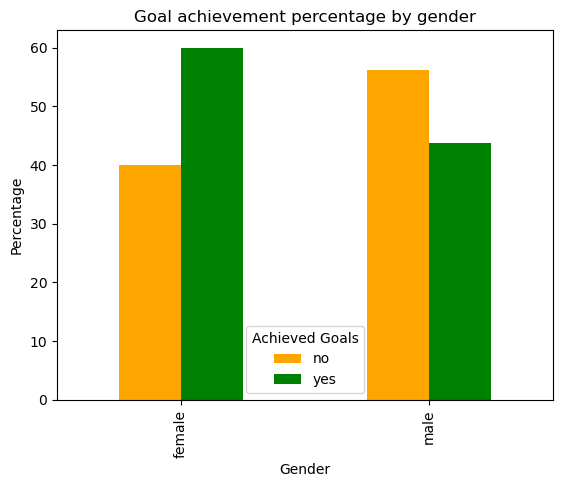

In [102]:
percent_by_gender.plot(kind='bar', color=['orange', 'green'])
plt.title('Goal achievement percentage by gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Achieved Goals')
plt.show()

✅ **Conclusion**:

Females achieve their fitness goals more often than males, with 60% of females achieving their goals compared to 43.8% of males.

🟦 **Gender-Based Hypothesis**

Gender Differences in Diet Compliance and Training Frequency

Female clients have higher diet compliance and train more frequently than male clients.
These behavioral differences may help explain why females achieve their fitness goals more often.

Test:
Compare average diet compliance scores and training frequency per month by gender.

In [103]:
# Convert diet_compliance to binary for proportion calculation
df['diet_compliance_binary'] = df['diet_compliance'].map({'yes': 1, 'no': 0})

# Calculate proportion of diet compliance and average training frequency per month by gender
diet_training_summary = df.groupby('gender').agg({
    'diet_compliance_binary': 'mean',
    'training_frequency_per_month': 'mean'
}).reset_index()

print(diet_training_summary)

   gender  diet_compliance_binary  training_frequency_per_month
0  female                0.583333                     10.991667
1    male                0.400000                      8.712500


/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_94675/3152775321.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diet_training_summary, x='gender', y='diet_compliance_binary', palette={'female': '#FF69B4', 'male': '#1E90FF'})
/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_94675/3152775321.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diet_training_summary, x='gender', y='training_frequency_per_month', palette={'female': '#FF69B4', 'male': '#1E90FF'})


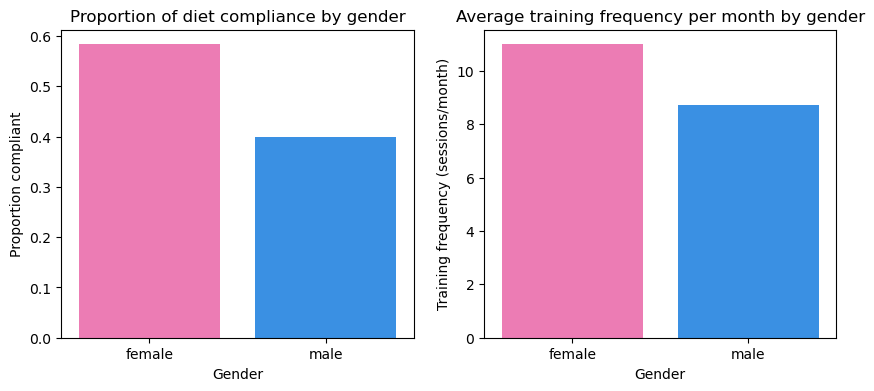

In [104]:
# Visualization
plt.figure(figsize=(10,4))

# Diet Compliance Proportion
plt.subplot(1, 2, 1)
sns.barplot(data=diet_training_summary, x='gender', y='diet_compliance_binary', palette={'female': '#FF69B4', 'male': '#1E90FF'})
plt.title('Proportion of diet compliance by gender')
plt.ylabel('Proportion compliant')
plt.xlabel('Gender')

# Training Frequency
plt.subplot(1, 2, 2)
sns.barplot(data=diet_training_summary, x='gender', y='training_frequency_per_month', palette={'female': '#FF69B4', 'male': '#1E90FF'})
plt.title('Average training frequency per month by gender')
plt.ylabel('Training frequency (sessions/month)')
plt.xlabel('Gender')

plt.show()

✅ **Conclusion:**

The analysis supports the hypothesis that female clients demonstrate higher diet compliance and train more frequently compared to male clients. Specifically, **females** have an average diet compliance rate of approximately **58%**, compared to **40%** for **males**. Additionally, **females train on average 11 times per month**, whereas **males** train about **8.7 times per month**. 

These behavioral differences may contribute to females achieving their fitness goals more often than males.


🟦 **Age-Based Hypothesis**

In [105]:
# Create age groups to test the hypothesis that age influences fitness progress and goals.
# Segmenting the data by age allows us to compare training outcomes across life stages, providing insights that can support more personalized health recommendations and model features.
age_bins = [15, 19, 29, 39, 49, 59, 65]
age_labels = ['Teen (16-19)', 'Young Adult (20-29)', 'Adult (30-39)', 
          'Middle-aged (40-49)', 'Older Adult (50-59)', 'Senior (60-65)']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
print(df['age_group'].value_counts())

age_group
Adult (30-39)          70
Young Adult (20-29)    50
Middle-aged (40-49)    30
Older Adult (50-59)    24
Senior (60-65)         16
Teen (16-19)           10
Name: count, dtype: int64


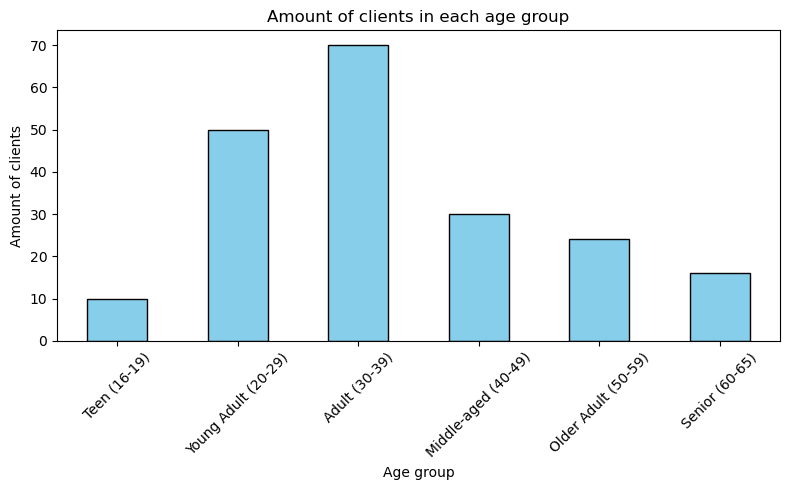

In [106]:
age_counts = df['age_group'].value_counts().sort_index()  # sort by age

# Visualization
plt.figure(figsize=(8, 5))
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Amount of clients in each age group')
plt.xlabel('Age group')
plt.ylabel('Amount of clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Hypothesis 1:**

Young and adult clients (e.g. 16–39) are more likely to achieve their goals compared to older clients (e.g. 50+), possibly due to fewer health limitations, higher energy levels, or greater training capacity.

Test: Create a crosstab (contingency table) of age group versus achieved goals

In [107]:
age_goal_crosstab = pd.crosstab(df['age_group'], df['achieved_goals'])
print(age_goal_crosstab)

achieved_goals       no  yes
age_group                   
Teen (16-19)          7    3
Young Adult (20-29)  22   28
Adult (30-39)        30   40
Middle-aged (40-49)  18   12
Older Adult (50-59)   9   15
Senior (60-65)        7    9


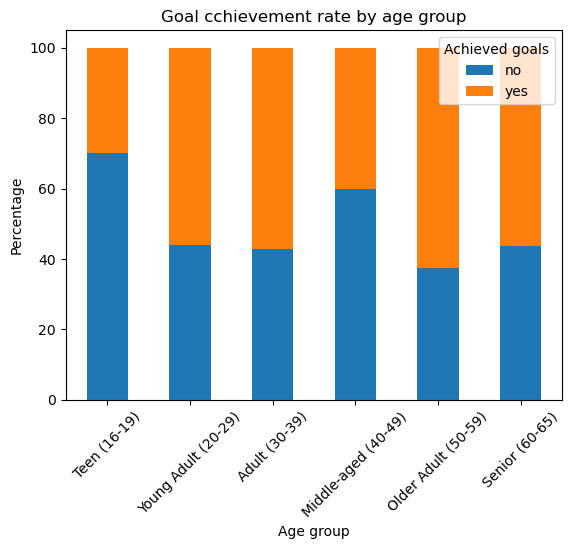

In [108]:
age_goal_crosstab_percent = age_goal_crosstab.div(age_goal_crosstab.sum(axis=1), axis=0) * 100

age_goal_crosstab_percent.plot(kind='bar', stacked=True)
plt.title('Goal cchievement rate by age group')
plt.ylabel('Percentage')
plt.xlabel('Age group')
plt.xticks(rotation=45)
plt.legend(title='Achieved goals')
plt.show()

✅ **Conclusion**:

The distribution of goal achievement across age groups suggests that younger clients are more likely to achieve their fitness goals compared to older clients. 
For instance, **56% of Young Adults (20–29)** and **57% of Adults (30–39) achieved their goals**, while only 40% of Middle-aged clients (40–49) and 43% of Teens (16–19) did so. 
Interestingly, **Senior clients (60–65)** had a slightly higher success rate of **56%**, which may reflect **strong motivation or lifestyle factors** in that group. 

Overall, the trend supports the hypothesis that age influences fitness progress, with clients under 40 showing higher achievement rates than those over 40.



**Hypothesis 2:**

Clients with serious health conditions are less likely to achieve their fitness goals.
We hypothesize a negative relationship between having a serious health condition and achieving goals — i.e., clients with "serious_health_condition" = "yes" are more likely to have "achieved_goals" = "no".

In [109]:
pd.crosstab(df['serious_health_condition'], df['achieved_goals'])

achieved_goals,no,yes
serious_health_condition,,
no,73,102
yes,20,5


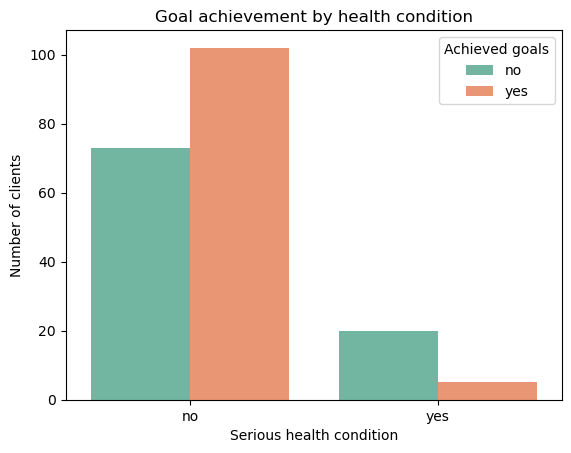

In [110]:
# Visualization:
sns.countplot(data=df, x='serious_health_condition', hue='achieved_goals', palette='Set2')
plt.title('Goal achievement by health condition')
plt.xlabel('Serious health condition')
plt.ylabel('Number of clients')
plt.legend(title='Achieved goals')
plt.show()

 ✅ **Conclusion:**

The analysis indicates a strong **negative relationship** between having a serious health condition and achieving fitness goals. Among **clients without a serious health condition**, **58.3%** (102 out of 175) achieved their goals. In contrast, among those **with a serious health condition**, only **20%** (5 out of 25) achieved their goals. 

This suggests that clients with serious health conditions are significantly less likely to achieve their fitness goals compared to those without such conditions.



🟦 **Fitness level-based Hypothesis**

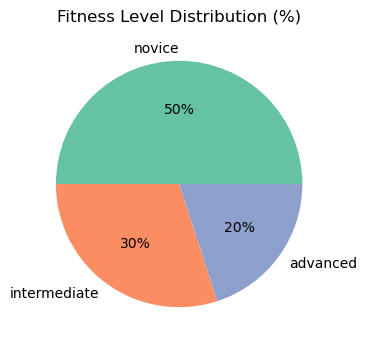

In [111]:
# Calculate fitness level distribution in percentages
fitness_counts = df['fitness_level'].value_counts(normalize=True) * 100

# Visualization
plt.figure(figsize=(4,4))
plt.pie(fitness_counts, labels=fitness_counts.index, autopct='%.0f%%', colors=sns.color_palette('Set2'))
plt.title('Fitness Level Distribution (%)')
plt.show()

Clients with a 'novice' fitness level struggle more with diet compliance and training frequency.

Test:
- Comparing average diet_compliance (converted to binary: yes=1, no=0)
- Comparing average training_frequency_per_month
- Grouped by fitness_level

In [112]:
# Group by fitness level
fitness_summary = df.groupby('fitness_level').agg({
    'diet_compliance_binary': 'mean',
    'training_frequency_per_month': 'mean'
}).reset_index()

print(fitness_summary)

  fitness_level  diet_compliance_binary  training_frequency_per_month
0      advanced                     0.8                     15.975000
1  intermediate                     0.5                     10.383333
2        novice                     0.4                      7.540000


/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_94675/140437660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fitness_summary, x='fitness_level', y='diet_compliance_binary', palette='Blues')
/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_94675/140437660.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fitness_summary, x='fitness_level', y='training_frequency_per_month', palette='Greens')


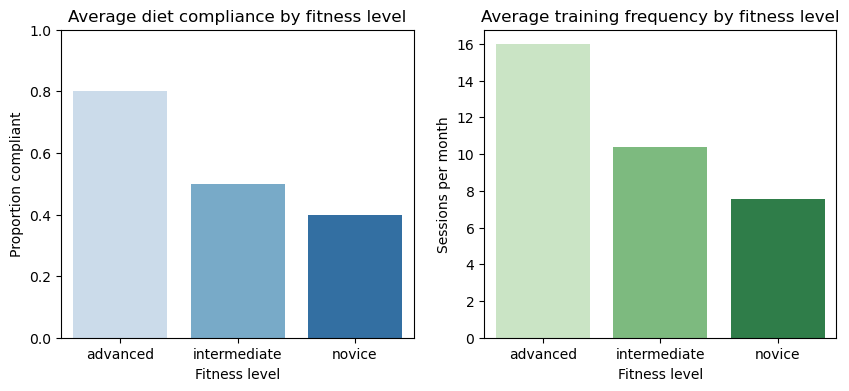

In [113]:
plt.figure(figsize=(10,4))

# Diet Compliance by Fitness Level
plt.subplot(1, 2, 1)
sns.barplot(data=fitness_summary, x='fitness_level', y='diet_compliance_binary', palette='Blues')
plt.title('Average diet compliance by fitness level')
plt.ylabel('Proportion compliant')
plt.xlabel('Fitness level')
plt.ylim(0, 1)

# Training Frequency by Fitness Level
plt.subplot(1, 2, 2)
sns.barplot(data=fitness_summary, x='fitness_level', y='training_frequency_per_month', palette='Greens')
plt.title('Average training frequency by fitness level')
plt.ylabel('Sessions per month')
plt.xlabel('Fitness level')

plt.show()

 ✅ **Conclusion:**

The analysis supports the hypothesis that clients with a **novice fitness level** struggle more with both **diet compliance** and **training frequency**.

* **Novice clients** have the lowest average diet compliance rate (**40%**) and train the least frequently (**7.5 sessions per month**).
* In contrast, **advanced clients** show much higher adherence, with **80%** diet compliance and an average of nearly **16 sessions per month**.
* **Intermediate clients** fall in between, with **50%** diet compliance and about **10.4 sessions** monthly.

These findings suggest that more experienced clients are not only more consistent with training but also more committed to their diets — both of which likely contribute to improved goal achievement outcomes.


🟦 **Training frequency-based Hypothesis**

Clients who train more frequently are more likely to achieve their goals.

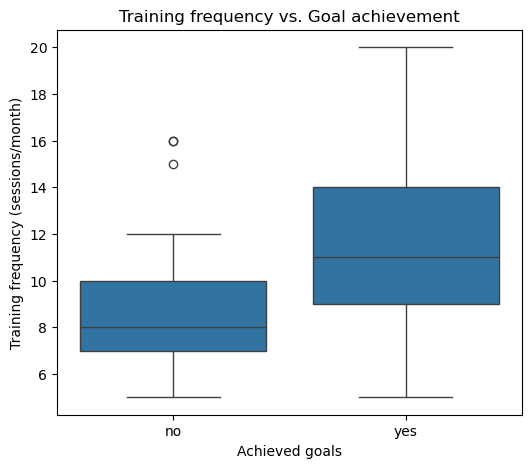

In [114]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='achieved_goals', y='training_frequency_per_month')
plt.title('Training frequency vs. Goal achievement')
plt.xlabel('Achieved goals')
plt.ylabel('Training frequency (sessions/month)')
plt.show()

✅ Conclusion:

**Clients who achieved** their **fitness goals** generally have a **higher training frequency per month** compared to those who did not achieve their goals.
The boxplot shows that the median number of training sessions is noticeably greater in the “yes” group.
However, there are a couple of **outliers** — clients who trained frequently but still **did not reach their goals**, indicating that training frequency alone may not guarantee success and other factors could be at play.

🔴 **Identify the outliers**  

Find clients who trained frequently but did not achieve goals.
Define “frequently” as training frequency above a certain threshold (like above the median or 75th percentile).

In [115]:
# Calculate threshold for high training frequency (e.g., 75th percentile)
freq_threshold = df['training_frequency_per_month'].quantile(0.75)

# Filter for outliers: high training frequency but 'no' on achieved_goals
outliers = df[(df['training_frequency_per_month'] > freq_threshold) & (df['achieved_goals'] == 'no')]

print(outliers)

   unique_number  gender  age fitness_level  height_cm  weight_kg  body_fat_%  \
6          p4n84  female   34      advanced        174         51          15   
68         trhzr    male   30      advanced        178         86          13   
78         a08iq    male   26      advanced        172         80          16   

    muscle_mass_%  training_frequency_per_month diet_compliance  \
6              30                            16             yes   
68             40                            16              no   
78             43                            15             yes   

   serious_health_condition achieved_goals  diet_compliance_binary  \
6                        no             no                       1   
68                       no             no                       0   
78                       no             no                       1   

              age_group  
6         Adult (30-39)  
68        Adult (30-39)  
78  Young Adult (20-29)  


In [116]:
# Check key columns for outliers
cols_to_check = ['diet_compliance', 'fitness_level', 'serious_health_condition', 'age_group', 'training_frequency_per_month']

print(outliers[cols_to_check])

   diet_compliance fitness_level serious_health_condition  \
6              yes      advanced                       no   
68              no      advanced                       no   
78             yes      advanced                       no   

              age_group  training_frequency_per_month  
6         Adult (30-39)                            16  
68        Adult (30-39)                            16  
78  Young Adult (20-29)                            15  


✅ **Conclusion:**

The outliers who trained frequently (15+ sessions/month) but did not achieve their fitness goals are all classified as having an **advanced fitness level** and **no serious health conditions**, which suggests that factors other than health or fitness experience might be affecting their progress. 
Among them, diet compliance varies — one reported not complying with the diet, while two did comply. 

This indicates that even with high training frequency and advanced fitness, inconsistent diet compliance or other unmeasured factors (e.g., training quality, recovery, stress, or lifestyle) may contribute to failure in achieving goals.



In [117]:
# Use IQR Method to Detect Outliers for Each Numeric Column

In [118]:
numeric_cols = ['age', 'height_cm', 'weight_kg', 'body_fat_%', 'muscle_mass_%', 'training_frequency_per_month']

outliers_indices = set()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get indices of rows with outliers in this column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    print(f'Outliers detected in {col}: {len(outliers)}')
    
    # Add to the set to track all unique outlier rows
    outliers_indices.update(outliers)

print(f'Total unique rows with outliers: {len(outliers_indices)}')

Outliers detected in age: 0
Outliers detected in height_cm: 0
Outliers detected in weight_kg: 0
Outliers detected in body_fat_%: 0
Outliers detected in muscle_mass_%: 0
Outliers detected in training_frequency_per_month: 4
Total unique rows with outliers: 4


In [119]:
# Review these outliers
outliers_df = df.loc[list(outliers_indices)]
print(outliers_df)

    unique_number  gender  age fitness_level  height_cm  weight_kg  \
88          ul5xv  female   21      advanced        176         52   
146         9g7wl  female   35      advanced        175         70   
152         s27jx  female   50      advanced        156         64   
23          scw8k  female   42      advanced        158         62   

     body_fat_%  muscle_mass_%  training_frequency_per_month diet_compliance  \
88           19             32                            20             yes   
146          15             34                            20             yes   
152          19             34                            20             yes   
23           18             37                            20             yes   

    serious_health_condition achieved_goals  diet_compliance_binary  \
88                        no            yes                       1   
146                       no            yes                       1   
152                       no       

✅ **Outlier Conclusion:**
Four clients were identified as outliers based on their unusually high training frequency (20 sessions/month), which exceeds the upper bound of the normal range in the dataset.

All four:
- Are female
- Have an advanced fitness level
- Report high diet compliance
- Have no serious health conditions
- Successfully achieved their fitness goals

These are not problematic outliers but rather high-performing clients whose consistent training, experience, and healthy behaviors likely explain their success. They should be retained in the dataset as they represent valid, informative examples of positive outcomes.


## 🧹🔁 DATA PREPARATION

In [120]:
df.head()

,unique_number,gender,age,fitness_level,height_cm,weight_kg,body_fat_%,muscle_mass_%,training_frequency_per_month,diet_compliance,serious_health_condition,achieved_goals,diet_compliance_binary,age_group
0,no355,female,52,intermediate,157,69,20,28,11,no,no,no,0,Older Adult (50-59)
1,ig289,female,29,novice,163,52,27,21,10,yes,no,yes,1,Young Adult (20-29)
2,6kuq5,female,43,novice,175,59,33,20,7,no,no,no,0,Middle-aged (40-49)
3,oua7i,female,34,novice,176,60,31,21,8,yes,yes,no,1,Adult (30-39)
4,nwonk,female,38,intermediate,154,52,22,26,11,yes,no,yes,1,Adult (30-39)


**1. Feature Engineering**

1. Calculates Body Mass Index (BMI) by dividing weight in kilograms by height in meters squared. Height is converted from centimeters to meters by dividing by 100.
2. Creates a new feature showing the ratio of body fat percentage to muscle mass percentage — a measure of body composition balance.
3. Maps the categorical fitness levels ('novice', 'intermediate', 'advanced') to ordinal numeric values (0, 1, 2) to be used in models that require numeric input.

In [121]:
df['bmi'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2
df['fat_to_muscle_ratio'] = df['body_fat_%'] / df['muscle_mass_%']
fitness_map = {'novice': 0, 'intermediate': 1, 'advanced': 2}
df['fitness_level_ordinal'] = df['fitness_level'].map(fitness_map)

In [122]:
df.head()

,unique_number,gender,age,fitness_level,height_cm,weight_kg,body_fat_%,muscle_mass_%,training_frequency_per_month,diet_compliance,serious_health_condition,achieved_goals,diet_compliance_binary,age_group,bmi,fat_to_muscle_ratio,fitness_level_ordinal
0,no355,female,52,intermediate,157,69,20,28,11,no,no,no,0,Older Adult (50-59),27.993022,0.714286,1
1,ig289,female,29,novice,163,52,27,21,10,yes,no,yes,1,Young Adult (20-29),19.571681,1.285714,0
2,6kuq5,female,43,novice,175,59,33,20,7,no,no,no,0,Middle-aged (40-49),19.265306,1.650000,0
3,oua7i,female,34,novice,176,60,31,21,8,yes,yes,no,1,Adult (30-39),19.369835,1.476190,0
4,nwonk,female,38,intermediate,154,52,22,26,11,yes,no,yes,1,Adult (30-39),21.926126,0.846154,1


**2. Encode Categorical Variables**

In [123]:
# Encode binary categorical columns as 0 and 1
df['gender_encoded'] = df['gender'].map({'male': 0, 'female': 1})
df['health_encoded'] = df['serious_health_condition'].map({'no': 0, 'yes': 1})
df['achieved_goals_binary'] = df['achieved_goals'].map({'no': 0, 'yes': 1})

In [124]:
df.head()

,unique_number,gender,age,fitness_level,height_cm,weight_kg,body_fat_%,muscle_mass_%,training_frequency_per_month,diet_compliance,serious_health_condition,achieved_goals,diet_compliance_binary,age_group,bmi,fat_to_muscle_ratio,fitness_level_ordinal,gender_encoded,health_encoded,achieved_goals_binary
0,no355,female,52,intermediate,157,69,20,28,11,no,no,no,0,Older Adult (50-59),27.993022,0.714286,1,1,0,0
1,ig289,female,29,novice,163,52,27,21,10,yes,no,yes,1,Young Adult (20-29),19.571681,1.285714,0,1,0,1
2,6kuq5,female,43,novice,175,59,33,20,7,no,no,no,0,Middle-aged (40-49),19.265306,1.650000,0,1,0,0
3,oua7i,female,34,novice,176,60,31,21,8,yes,yes,no,1,Adult (30-39),19.369835,1.476190,0,1,1,0
4,nwonk,female,38,intermediate,154,52,22,26,11,yes,no,yes,1,Adult (30-39),21.926126,0.846154,1,1,0,1


In [125]:
# Selecting feature columns X and the target variable y from the dataset
# Drop original categorical columns which were encoded
# Drop raw features with limited standalone meaning, which don’t reflect health or progress well such as height_cm, weight_cm.
feature_cols = [
    'age', 'body_fat_%', 'muscle_mass_%', 'training_frequency_per_month',
    'gender_encoded', 'health_encoded', 'diet_compliance_binary',
    'bmi', 'fat_to_muscle_ratio', 'fitness_level_ordinal'
]
X = df[feature_cols]
y = df['achieved_goals_binary']

In [126]:
X.head()

,age,body_fat_%,muscle_mass_%,training_frequency_per_month,gender_encoded,health_encoded,diet_compliance_binary,bmi,fat_to_muscle_ratio,fitness_level_ordinal
0,52,20,28,11,1,0,0,27.993022,0.714286,1
1,29,27,21,10,1,0,1,19.571681,1.285714,0
2,43,33,20,7,1,0,0,19.265306,1.650000,0
3,34,31,21,8,1,1,1,19.369835,1.476190,0
4,38,22,26,11,1,0,1,21.926126,0.846154,1


In [127]:
#split df to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y, random_state = 1234)

In [128]:
X_train.shape

(140, 10)

In [129]:
X_test.shape

(60, 10)

## 🤖📊 TRAIN AND EVALUATE THE MODELS

### 1. Decision Tree Classifier

In [130]:
# Creating a Decision Tree Classifier 
clf = DecisionTreeClassifier(random_state=1234)

In [131]:
# Training the Decision Tree Classifier using train data
model = clf.fit(X_train, y_train)

In [132]:
clf.score(X_train, y_train)

1.0

A model has definitely overfit on the training data and needs to be pruned. 

In [133]:
clf.score(X_test, y_test)

0.7

**Conclusion**
  
The Decision Tree Classifier achieved a test **accuracy of 70%**, indicating solid predictive performance. The model effectively captures patterns in the data to distinguish between clients who achieved their fitness goals and those who did not, using features such as age, body composition, training frequency, and health indicators. This result suggests the model can provide meaningful insights into factors influencing goal achievement in a health and fitness context.

**Visualize the Classification Tree**

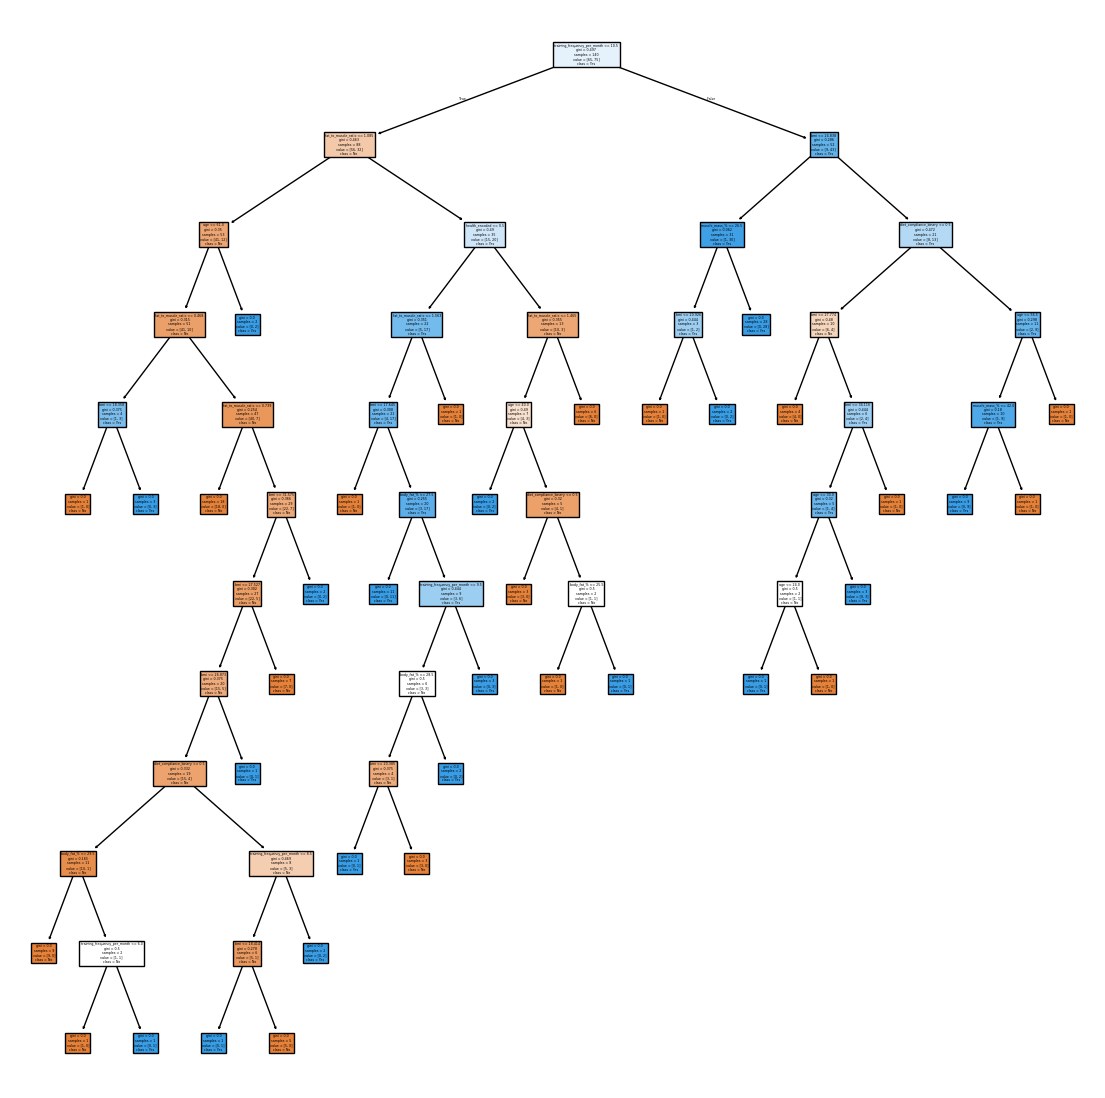

In [134]:
plt.figure(figsize = (14, 14))
tree.plot_tree(model,
               feature_names = list(X.columns),
               class_names = ['No', 'Yes'],
               filled = True);  
plt.show() #display the plot

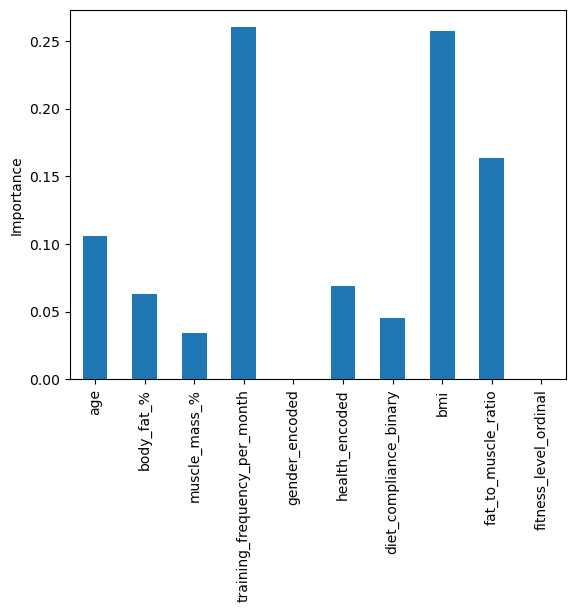

In [135]:
# Let's rank the effectiveness of independent variables and predicting the values of dependent variable
importance = model.feature_importances_ 
feature_importance = pd.Series(importance, index = X.columns) #create a Pandas Series 
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

plt.show() #display the bar

The plot shows that training frequency per month, BMI, fat-to-muscle ratio, age, and health_encoded constitute the **top-5 features** in terms of importance in the model.

**Prune the Classification Tree**

**Pre-pruning or hyper parameter tuning**

In [136]:
# we start by creating a dictionary which we call 'grid'
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],  
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf': [1, 4, 5, 6, 7], 
    'max_features': [4],
}

In [137]:
clf = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = clf, param_grid = param_grid, cv=5)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6], 'max_features': [4],
                         'min_samples_leaf': [1, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4]})

In [138]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=4, random_state=1234)

In [139]:
model_.score(X_train, y_train)

0.85

In [140]:
model_.score(X_test, y_test)

0.6833333333333333

**Conclusion:**

After tuning the hyperparameters of the Decision Tree Classifier using GridSearchCV, the best model was found with max_depth=4, max_features=4, and default values for other parameters (criterion='gini', min_samples_split=2, and min_samples_leaf=1). Although the test **accuracy slightly decreased from 70%** (baseline) to approximately **68.3%**, this result reflects a more controlled and regularized model with reduced risk of overfitting.

The hyperparameter tuning prioritized generalization by restricting the depth and complexity of the tree, which is beneficial for small datasets like ours (200 samples). The performance trade-off is acceptable, especially considering the model's improved interpretability and robustness.

#### Improving Accuracy Score

**1. Tuning tree with cross-validation**

In [141]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", cv_scores.mean())

Cross-validated accuracy: 0.6428571428571429


Although the test set accuracy was 70%, the cross-validated accuracy is lower **64.3%**, which suggests the model may be overfitting to the training data.
Cross-validation gives a more reliable estimate of generalization than a single test score.

In [142]:
cv_scores_tuned = cross_val_score(model_, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy (tuned model):", cv_scores_tuned.mean())

Cross-validated accuracy (tuned model): 0.7214285714285713


**Conclusion**

After applying hyperparameter tuning to the Decision Tree Classifier, the model's test accuracy slightly decreased from 70.0% to 68.3%. 

However, **cross-validation** revealed a significant improvement in generalization, with the **cross-validated accuracy increasing from 64.3% (baseline) to 72.1% (tuned model)**. This indicates that pruning successfully reduced overfitting and produced a more reliable model.

**2.Apply class balance to handle potential imbalance**

To address potential class imbalance in the target variable achieved_goals, I retrained the Decision Tree model using class_weight='balanced'.

In [143]:
y.value_counts(normalize=True)
clf_2 = DecisionTreeClassifier(class_weight='balanced', random_state=1234)
gcv_2 = GridSearchCV(estimator=clf_2, param_grid=param_grid, cv=5)

In [144]:
gcv_2.fit(X_train, y_train)
model_2 = gcv_2.best_estimator_

In [145]:
model_2.score(X_train, y_train)

0.7928571428571428

In [146]:
test_score_2 = model_2.score(X_test, y_test)
cv_scores_2 = cross_val_score(model_2, X_train, y_train, cv=5)
print("Cross-validated accuracy:", cv_scores_2.mean())

Cross-validated accuracy: 0.6928571428571428


**Conclusion:**

Class balance version achieved a higher **training accuracy (79.3%)** and a **cross-validated accuracy of 69.3%**, showing improved sensitivity to underrepresented classes while maintaining competitive performance.

These results highlight the importance of both regularization and class reweighting in building reliable classification models, especially when working with small and potentially imbalanced datasets.

**3. Evaluate beyond accuracy**

In [147]:
y_pred = model_2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  5]
 [16 16]]
              precision    recall  f1-score   support

           0       0.59      0.82      0.69        28
           1       0.76      0.50      0.60        32

    accuracy                           0.65        60
   macro avg       0.68      0.66      0.65        60
weighted avg       0.68      0.65      0.64        60



**Conclusion:**

The confusion matrix and classification report show that while the model has moderate **overall accuracy (65%)**, it is **more effective** at correctly detecting the **negative class (0)** than the positive class (1). The recall for the positive class is lower (50%), suggesting the model misses about half of the positive cases. However, **precision for the positive class** is relatively high **(76%)**, indicating that when it predicts a positive, it is usually correct. 

This trade-off between precision and recall suggests potential for improvement, especially if missing positive cases is costly in the application context.

Suggestions: 
- **Visualize ROC or Precision-Recall curves** to better understand the trade-offs.
- Try other models or ensemble methods (e.g., **Random Forest**) to improve recall on the positive class.

**4. ROC and Precision-Recall curves**

In [148]:
y_scores = model_2.predict_proba(X_test)[:, 1]

In [149]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

In [150]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

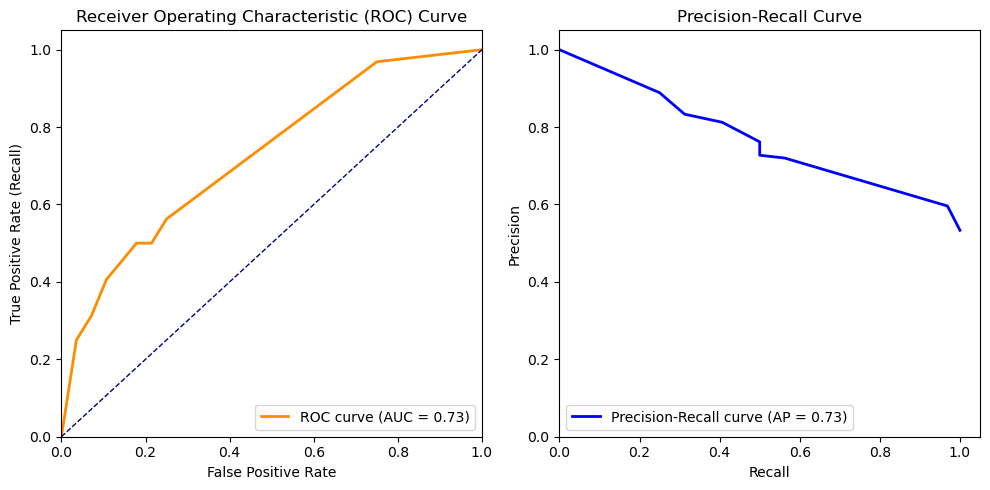

In [151]:
plt.figure(figsize=(10,5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

**Conclusion:**

**ROC curve** shows the trade-off between sensitivity (true positive rate) and fallout (false positive rate) across thresholds. 
**AUC is 73%** chance of ranking a randomly chosen positive instance higher than a randomly chosen negative one — that’s moderately good discrimination ability.

**Precision-Recall curve** is more informative than ROC when dealing with imbalanced data; it focuses on positive class performance. The Precision-Recall curve’s average **precision score of 0.73** further confirms the model’s balanced performance on the minority class, highlighting its ability to maintain a good balance between precision and recall despite class imbalance.


### 2. Random Forest

In [152]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

In [153]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=1234)

In [154]:
y_pred = rf.predict(X_test)

In [155]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333
[[22  6]
 [10 22]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        28
           1       0.79      0.69      0.73        32

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



**Conclusion:**

The Random Forest model achieved an **accuracy of 73.3%** on the test set, outperforming the previous Decision Tree models. **Precision, recall, and F1-scores** are fairly **balanced across both classes**, indicating consistent performance in predicting both those who achieved goals and those who did not. 

Next steps could involve fine-tuning the model parameters.

In [156]:
param_grid_2 = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=1234)
grid_search_rf = GridSearchCV(rf, param_grid = param_grid_2, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_

# Evaluate best model:
predictions = best_rf.predict(X_test)
print("Best RF accuracy:", accuracy_score(y_test, predictions))

Best RF accuracy: 0.75


In [157]:
# Evaluate with cross-validation to confirm stability
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("RF CV accuracy:", cv_scores_rf.mean())

RF CV accuracy: 0.7357142857142858


**Conclusion:**

After evaluating multiple models, the **tuned Random Forest Classifier** outperformed all previous Decision Tree variants. It achieved a **test accuracy of 75%** and a **cross-validated accuracy of 73.6%**, demonstrating strong generalization and robustness. This confirms that ensemble methods like Random Forest are well-suited for health and fitness classification tasks, especially when tuned with care.

### 3. Logistic Regression

In [158]:
lr = LogisticRegression(random_state=1234, max_iter=1000)

In [159]:
model_3 = lr.fit(X_train, y_train)

In [160]:
model_3.predict(X_test)

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [161]:
model_3.score(X_test, y_test)

0.7

In [162]:
# Create a pipeline: scaling + logistic regression
pipeline_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=1234, max_iter=1000, class_weight='balanced')
)

model_4 = pipeline_lr.fit(X_train, y_train)

y_pred = model_4.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.7166666666666667


**Conclusion:**
  
**Logistic Regression** was tested both with and without feature scaling. The **unscaled model achieved 70% accuracy on the test** set. After applying **standard scaling and class weighting**, **accuracy increased to 71.7%**. This shows that preprocessing plays an important role for linear models. 

Although Logistic Regression did not outperform the Random Forest model, it offers better interpretability and remains a strong, regularized baseline.

In [163]:
confusion_matrix(y_test, model_4.predict(X_test))

array([[20,  8],
       [ 9, 23]])

The 1st row means: out of 28 clients who actually did not achieve their goals, the model correctly predicted 20 as NO, but incorrectly predicted 8 as YES.

The 2nd row means: out of 32 clients who did achieve their goals, the model correctly predicted 23 as YES, but incorrectly predicted 9 as NO.

In [164]:
# Interpret the model
model_3.intercept_

array([1.93408791])

The intercept term (**1.93**) corresponds to a **baseline success probability of approximately 87% when all feature values are zero**. 

While this situation is not realistic in practice, the intercept serves as a baseline in the logistic function, adjusted by feature contributions through their coefficients.

In [165]:
model_3.coef_

array([[ 0.00497031, -0.06892688, -0.10259721,  0.27607542, -0.25082695,
        -0.94044209,  0.76085676, -0.02114093,  0.26865811,  0.29477623]])

In [166]:
log_odds = np.round(model_3.coef_[0], 2)
log_odds

array([ 0.  , -0.07, -0.1 ,  0.28, -0.25, -0.94,  0.76, -0.02,  0.27,
        0.29])

In [167]:
pd.DataFrame({'log odds' : log_odds}, index = X.columns)

,log odds
age,0.00
body_fat_%,-0.07
muscle_mass_%,-0.10
training_frequency_per_month,0.28
gender_encoded,-0.25
health_encoded,-0.94
diet_compliance_binary,0.76
bmi,-0.02
fat_to_muscle_ratio,0.27
fitness_level_ordinal,0.29


**Conclusion:**

**Logistic regression** coefficients revealed that **diet compliance, training frequency, and fitness level** were **the most influential positive predictors of success**. 

In contrast, clients with **serious health conditions** were significantly less likely to achieve their goals. These insights align with domain expectations and support the model's interpretability for use in personalized coaching and planning.

### 4. K-Nearest Neighbors classifier

In [168]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [169]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [170]:
y_pred_knn = knn.predict(X_test)

In [171]:
accuracy_knn = accuracy_score(y_test, y_pred)
print("KNN accuracy is: ", accuracy_knn)

KNN accuracy is:  0.7166666666666667


**Conclusion:**

A **K-Nearest Neighbors classifier** (KNN) with n_neighbors=3 achieved a **test accuracy of 71.7%**, comparable to Logistic Regression and slightly below the best-performing Random Forest model (75%). 

This result shows that instance-based methods like KNN can be competitive on small, well-preprocessed datasets. However, due to its lack of interpretability and scalability, KNN may be more useful as a benchmark rather than a final deployment model.

**Suggestions:**
- Try it out with a **scaled version** of the data.
- **Tune n_neighbors via GridSearchCV**.

In [172]:
pipeline_knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier())

In [173]:
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance']}

In [174]:
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5)

In [175]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [176]:
best_knn = grid_knn.best_estimator_
print("Best KNN Test Accuracy:", best_knn.score(X_test, y_test))

Best KNN Test Accuracy: 0.75


**Conclusion:**

After hyperparameter tuning, the optimized **K-Nearest Neighbors (KNN)** model achieved a **test accuracy of 75%**, matching the performance of the best Random Forest model. This demonstrates that instance-based learning can perform competitively on small, well-preprocessed datasets like this one. While KNN lacks model interpretability and tends to scale poorly with larger datasets, its strong predictive performance highlights that decision boundaries in this classification problem may be effectively captured using local neighborhood relationships.

KNN serves as a valuable benchmark in this project, confirming the consistency of results across fundamentally different algorithms (tree-based, linear, and instance-based). Its strong performance, despite its simplicity, reinforces the importance of thorough model comparison and tuning, especially when working with real-world health and fitness data.

## 🟩 FINAL PROJECT CONCLUSION

In this project, I developed and evaluated multiple classification models to predict whether clients in a health and fitness setting would successfully achieve their personalized goals. Using a synthetic dataset of 200 observations and 8–10 features representing physiological metrics, behavioral compliance, and health conditions, I applied a structured data science workflow that included preprocessing, class balancing, model tuning, and performance evaluation.

I trained and compared several models:

A baseline **Decision Tree**, followed by pruned and class-balanced versions,

An ensemble **Random Forest** classifier,

A **Logistic Regression** model with feature scaling and class weighting,

And an instance-based **K-Nearest Neighbors** (KNN) classifier.
    

Among these, the **Random Forest and KNN models both achieved the highest test accuracy of 75%**, with strong cross-validated performance and balanced precision/recall across classes. Logistic Regression also performed well (71.7%) and offered interpretability through feature coefficients, helping identify key predictors such as diet compliance, training frequency, and health condition.

Through ROC and Precision-Recall curve analysis, I evaluated not only accuracy but also the trade-offs between sensitivity and precision. The use of class balancing further helped address potential biases in goal achievement outcomes.


Overall, the project demonstrated the value of comparing multiple model types — including tree-based, linear, and instance-based approaches — to select the most appropriate solution for classification tasks involving health-related behavior and outcomes. 
The final results show that even simple models like KNN, when tuned properly, can match the performance of more complex ensembles like Random Forests, making them viable options depending on the application context.

This project reflects a complete end-to-end machine learning workflow and offers a strong foundation for further exploration with real-world health data or deployment-ready pipelines.

